In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sklearn.metrics as metrics
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('headbrain.csv')
print(df.shape)
df.head()
df.info()
df.isnull().sum()

FileNotFoundError: [Errno 2] No such file or directory: 'headbrain.csv'

In [ ]:
plt.boxplot(df['Head Size(cm^3)'],showmeans=True,labels = ['Head Size'])

In [ ]:
plt.boxplot(df['Brain Weight(grams)'],showmeans=True,labels = ['Brain Weight'])

In [ ]:

df=df.drop(['Gender','Age Range'],axis=1)

In [ ]:
df.head()

In [ ]:
Y = np.array(df['Brain Weight(grams)'].to_list())
X = np.array(df['Head Size(cm^3)'].to_list())

In [ ]:
hb_corr = df.corr()

In [ ]:
hb_corr

In [ ]:
sns.heatmap(hb_corr)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y)
plt.title('Head Size VS Brain Weight')
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')
plt.show()

In [ ]:
def calculate_zscore(data_values):
    # mean
    mean_vals = np.mean(data_values)
    # standard deviation
    std_dev = np.std(data_values)
    # applying the formula for all the values
    zscore = np.array([(i - mean_vals)/std_dev for i in data_values])
    return zscore

In [ ]:
def get_outlier_vals(data_values):
    # z_score values of all the data values
    z_scores = calculate_zscore(data_values=data_values)
    
    # get the index of the outlier
    # whose value is > 3
    # whose value is < -3
    inds = list(np.where(z_scores < -3)[0])
    inds.extend(list(np.where(z_scores > 3)[0]))
    
    outlier_vals = [data_values[i] for i in sorted(inds)]
    
    return outlier_vals

In [ ]:
out_x = get_outlier_vals(data_values=X)
out_Y = get_outlier_vals(data_values=Y)
print(out_x)
print(out_Y)


In [ ]:
# confidence level
plt.figure(figsize=(10, 6))
sns.regplot(X, Y)
plt.show()

In [ ]:
w1, w0 = np.polyfit(x, Y, 1)

In [ ]:
y_preds = (w1 * x) + w0

In [ ]:
# scatter and line
plt.figure(figsize=(10, 6))
plt.scatter(x, Y, color='blue')
plt.plot(x, y_preds, color='red')
plt.show()

In [ ]:
import plotly.graph_objects as go

In [ ]:
trace1 = go.Scatter(
    x=x,
    y=Y,
    mode='markers',
    name='Data Points'
)

trace2 = go.Scatter(
    x=x,
    y=y_preds,
    mode='lines',
    name='Best Fit Line'
)

layout = go.Layout(
    title='Linear Regression Model (Brain weight & Head Size)',
    height=500,
    width=800,
    margin=dict(l=0, b=10, t=50, r=0)
)

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

In [ ]:
y_preds

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

In [ ]:
def build_model(X, y):
    x_dim = 1 if (len(X.shape) == 1) else X.shape[1]
    b, a = np.polyfit(x=X, y=y, deg=x_dim)
    return b, a

In [ ]:
def predict(X_new, w1, w0):
    X_new = np.array(X_new)
    y_preds = (w1 * X_new) + w0
    return list(y_preds)

In [ ]:
from sklearn.model_selection import train_test_split
X = X.reshape(-1,1)
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.75, random_state = 10 )


In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
X = X.reshape(-1,1)
regressor.fit(X_train,y_train)

In [ ]:
LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred=regressor.predict(X_test)
y_pred
y_test
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
r2 = r2_score(y_test, y_pred)

In [ ]:
r2_score(y_test, y_pred)

In [ ]:
metrics.mean_squared_error(y_test, y_pred)

In [ ]:
metrics.explained_variance_score(y_test, y_pred)

In [ ]:
print('-------------------------------------')
print('| r2 score   is:|',  r2 ,'|' )
print('| rmse score is:|', rmse,' |')
print('-------------------------------------')


In [ ]:
r21 = r2_score(Y, y_preds)

In [ ]:
r21

In [ ]:
r22 = r2_score(X,Y)
r22

In [ ]:
#Multivariate Regression

In [3]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [4]:
filename = 'healthcare-dataset-stroke-data.csv'

df1 = pd.read_csv(filename)
df1.head(10)
df1.info

<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

In [7]:
df1[df1.isnull().any(axis=1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [8]:
#Checking for missing values in the dataset
print("Number of Missing Values in our data set\n")
missing_data = df1.isnull().sum().to_frame().reset_index().rename({"index" : 'Variable', 0: 'No of Missing Values'}, axis =1)
display(missing_data.style.background_gradient('gnuplot2_r'))

Number of Missing Values in our data set



,Variable,No of Missing Values
0,id,0
1,gender,0
2,age,0
3,hypertension,0
4,heart_disease,0
5,ever_married,0
6,work_type,0
7,Residence_type,0
8,avg_glucose_level,0
9,bmi,201


In [9]:
#Checking Summary of categorical columns
df1.describe(include="object")

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [10]:
#Removing Unique Coloumn ID
df1 = df1.drop('id',axis = 1)

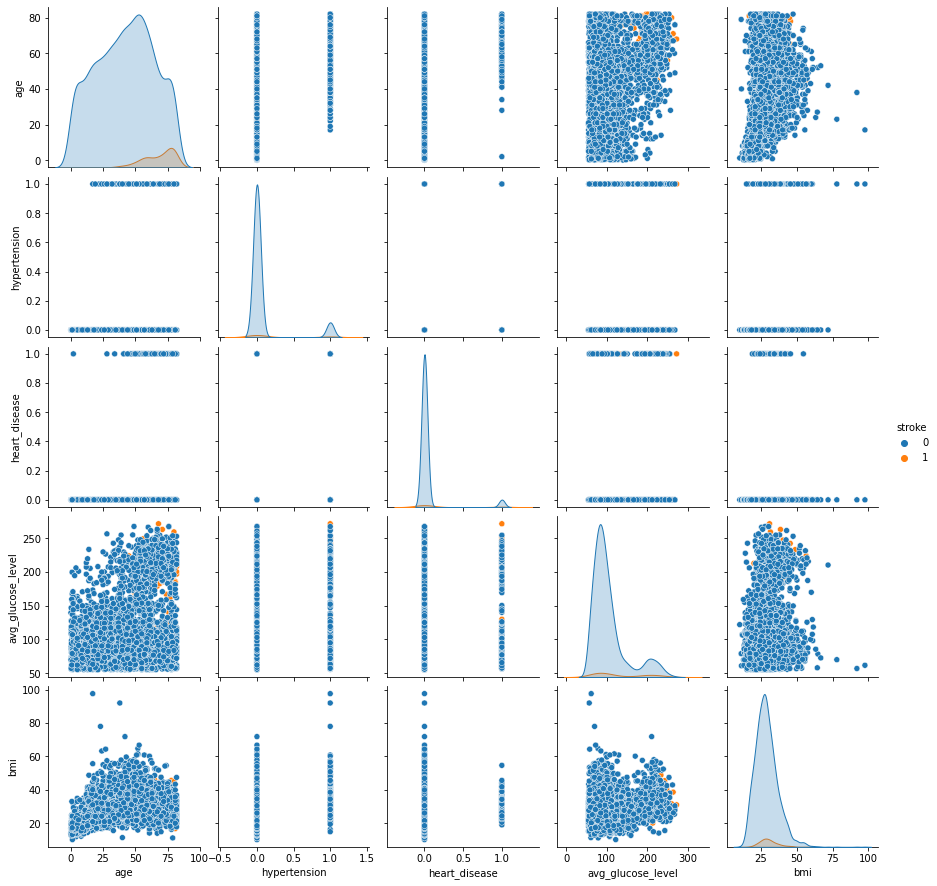

In [11]:
#Checking the relationship between variables of data using pairplot
from matplotlib import pyplot  as plt
import seaborn as sns
sns.pairplot(df1,diag_kind="kde",hue="stroke")

In [12]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [13]:
#Binary Coding
df1['ever_married'] = df1['ever_married'].replace({'No': 0, 'Yes':1})
    
df1['Residence_type'] = df1['Residence_type'].replace({'Rural': 0, 'Urban':1})

#df1['gender'] = df1['gender'].replace({'Male': 0, 'Urban':1})

In [14]:
#one-Hot encoding
for column in ['gender','work_type','smoking_status']:
    dummies = pd.get_dummies(df1[column],prefix=column)
    df1 = pd.concat([df1, dummies], axis =1)
    df1 = df1.drop(column, axis =1)

In [ ]:
#df1.drop('work_type', axis = 1, inplace = True)

#for column in ['gender','work_type','smoking_status']:
    

In [15]:
df1.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,1,0,202.21,NaN,1,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,1,1,171.23,34.4,1,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,1,0,174.12,24.0,1,1,0,0,0,0,0,1,0,0,0,1,0


In [16]:
x = df1

In [17]:
imputer = KNNImputer()
imputer.fit(x)

x = pd.DataFrame(imputer.transform(x), index = x.index, columns = x.columns)
#X_test = pd.DataFrame(imputer.transform(X_test), index = X_test.index, columns = X_test.columns)

In [ ]:
#Checking the relationship between variables of data using pairplot
from matplotlib import pyplot  as plt
import seaborn as sns
sns.pairplot(df1,diag_kind="kde",hue="stroke")

In [ ]:
plt.boxplot(x['age'],showmeans=True,labels = ['Age'])
#x2 = x['avg_glucose_level'],showmeans=True,labels = ['Avg glucose Level']
#x3 = x['ever_married'], labels = ['ever_married ']

#plt.boxplot(df['Brain Weight(grams)'],showmeans=True,labels = ['Brain Weight'])

In [ ]:
plt.boxplot(x['avg_glucose_level'],showmeans=True,labels = ['Avg glucose level'])

In [ ]:
plt.boxplot(x['ever_married'],showmeans=True,labels = ['Married yes/no'])

In [ ]:
# Pandas dataframe
data = pd.DataFrame({"Box1": np.random.rand(10), "Box2": np.random.rand(10)})

# Plot the dataframe
ax = data[['Box1', 'Box2']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

In [ ]:
x.info()

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(x.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

In [ ]:
x.corr()['stroke'].sort_values(ascending=False)[1:]

In [ ]:
#Y = x['bmi']
#X = x[!='bmi']
#X = df1.drop('id',axis = 1)

X = x.loc[ : , x.columns != 'bmi'].values
Y = x['bmi'].values

In [ ]:
X

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, random_state = 0)

In [ ]:
Y_train

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

In [ ]:
r3 = r2_score(Y_test, y_pred)

In [ ]:
metrics.explained_variance_score(Y_test, y_pred)

In [ ]:
print('-------------------------------------')
print('| r2 score   is:|',  r3,'|' )
print('-------------------------------------')


In [ ]:
# Logistic

In [ ]:
x.stroke.value_counts()

In [ ]:
stroke_label = x.stroke.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(stroke_label.index, stroke_label);
plt.xlabel('Stroke', fontsize=20);
plt.ylabel('Count', fontsize=20)

In [ ]:
df_st=['gender_Female','gender_Female','hypertension','heart_disease','stroke']
fig, axs = plt.subplots(4, 2, figsize=(15,15))
axs = axs.flatten()
for i, col_name in enumerate(df_st):
     
     sns.countplot(x=col_name, data= x , ax=axs[i], hue =x['stroke'],palette='mako_r')
     #ax.set_title(col_name, fontdict={'fontsize': 12},fontweight ='bold')
     plt.title(col_name)

In [ ]:
X = x.loc[ : , x.columns != 'stroke'].values
Y = x['stroke'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [ ]:
cm

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))


In [ ]:
log_reg_model=LogisticRegression(random_state=0)
log_reg_model.fit(X_train,Y_train)
y_pred=log_reg_model.predict(X_test)
from sklearn import metrics

log_reg_cm = metrics.confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(log_reg_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(Y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(Y_test,y_pred))

In [ ]:
#X = x.loc[ : , x.columns != 'bmi'].values
#Y = x['bmi'].values

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Person does not have chances of stroke', 'Person has chances of stroke']
print(classification_report(Y_test, y_pred, target_names=target_names))

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
from sklearn.metrics import roc_curve, auc
import plotly.express as px
y_predicted = classifier.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, y_predicted)
roc_fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=800, height=500,
    template='plotly_dark'
)
roc_fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

roc_fig.update_yaxes(scaleanchor="x", scaleratio=1)
roc_fig.update_xaxes(constrain='domain')
roc_fig.show()

In [ ]:
#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
#X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

In [ ]:
# Decision Tree

In [ ]:
#X = x.loc[ : , x.columns != 'stroke'].values
#Y = x['stroke'].values

In [24]:
x.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,1.0,1.0,228.69,36.60,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,61.0,0.0,0.0,1.0,0.0,202.21,32.56,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0.0,1.0,1.0,0.0,105.92,32.50,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0.0,0.0,1.0,1.0,171.23,34.40,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,79.0,1.0,0.0,1.0,0.0,174.12,24.00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [19]:

features = ['heart_disease', 'age']

X = x.loc[:, features].values
Y = x['stroke'].values

                        

<AxesSubplot:xlabel='avg_glucose_level', ylabel='age'>

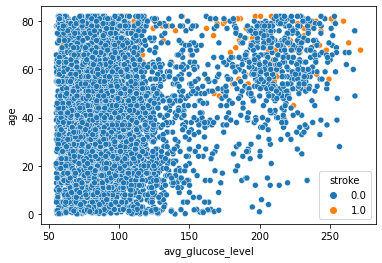

In [23]:
df_example = x[['avg_glucose_level', 'age', 'stroke']]
sns.scatterplot(data = x, x ='avg_glucose_level', y = 'age', hue = 'stroke')

In [39]:
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)
X, Y = smote.fit_resample(x[['avg_glucose_level', 'age']], x['stroke'])
X
#Creating a new Oversampling Data Frame
#df_oversampler = pd.DataFrame(X, columns = ['avg_glucose_level', 'age'])
#df_oversampler['stroke']
#sns.countplot(df_oversampler['stroke'])

,avg_glucose_level,age
0,228.690000,67.000000
1,202.210000,61.000000
2,105.920000,80.000000
3,171.230000,49.000000
4,174.120000,79.000000
...,...,...
9717,90.302110,59.363465
9718,76.082887,70.300717
9719,81.152490,68.451156
9720,138.159022,66.988316


<AxesSubplot:xlabel='avg_glucose_level', ylabel='age'>

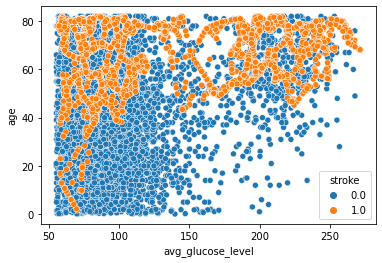

In [40]:
#df_example = X[['avg_glucose_level', 'age', 'stroke']]
sns.scatterplot(data = X, x ='avg_glucose_level', y = 'age', hue = Y)

In [41]:
X = X.values
Y = Y.values

In [ ]:
#pip install -U imbalanced-learn

In [42]:
#conda install -c glemaitre imbalanced-learn

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, random_state = 100)

In [44]:
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=42)
#x_train, y_train = sm.fit_resample(X_train, Y_train)

In [45]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [46]:
y_pred = classifier.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [48]:
cm

array([[1136,   77],
       [  75, 1143]])

In [49]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      1213
         1.0       0.94      0.94      0.94      1218

    accuracy                           0.94      2431
   macro avg       0.94      0.94      0.94      2431
weighted avg       0.94      0.94      0.94      2431



In [53]:
from matplotlib.pyplot import figure


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


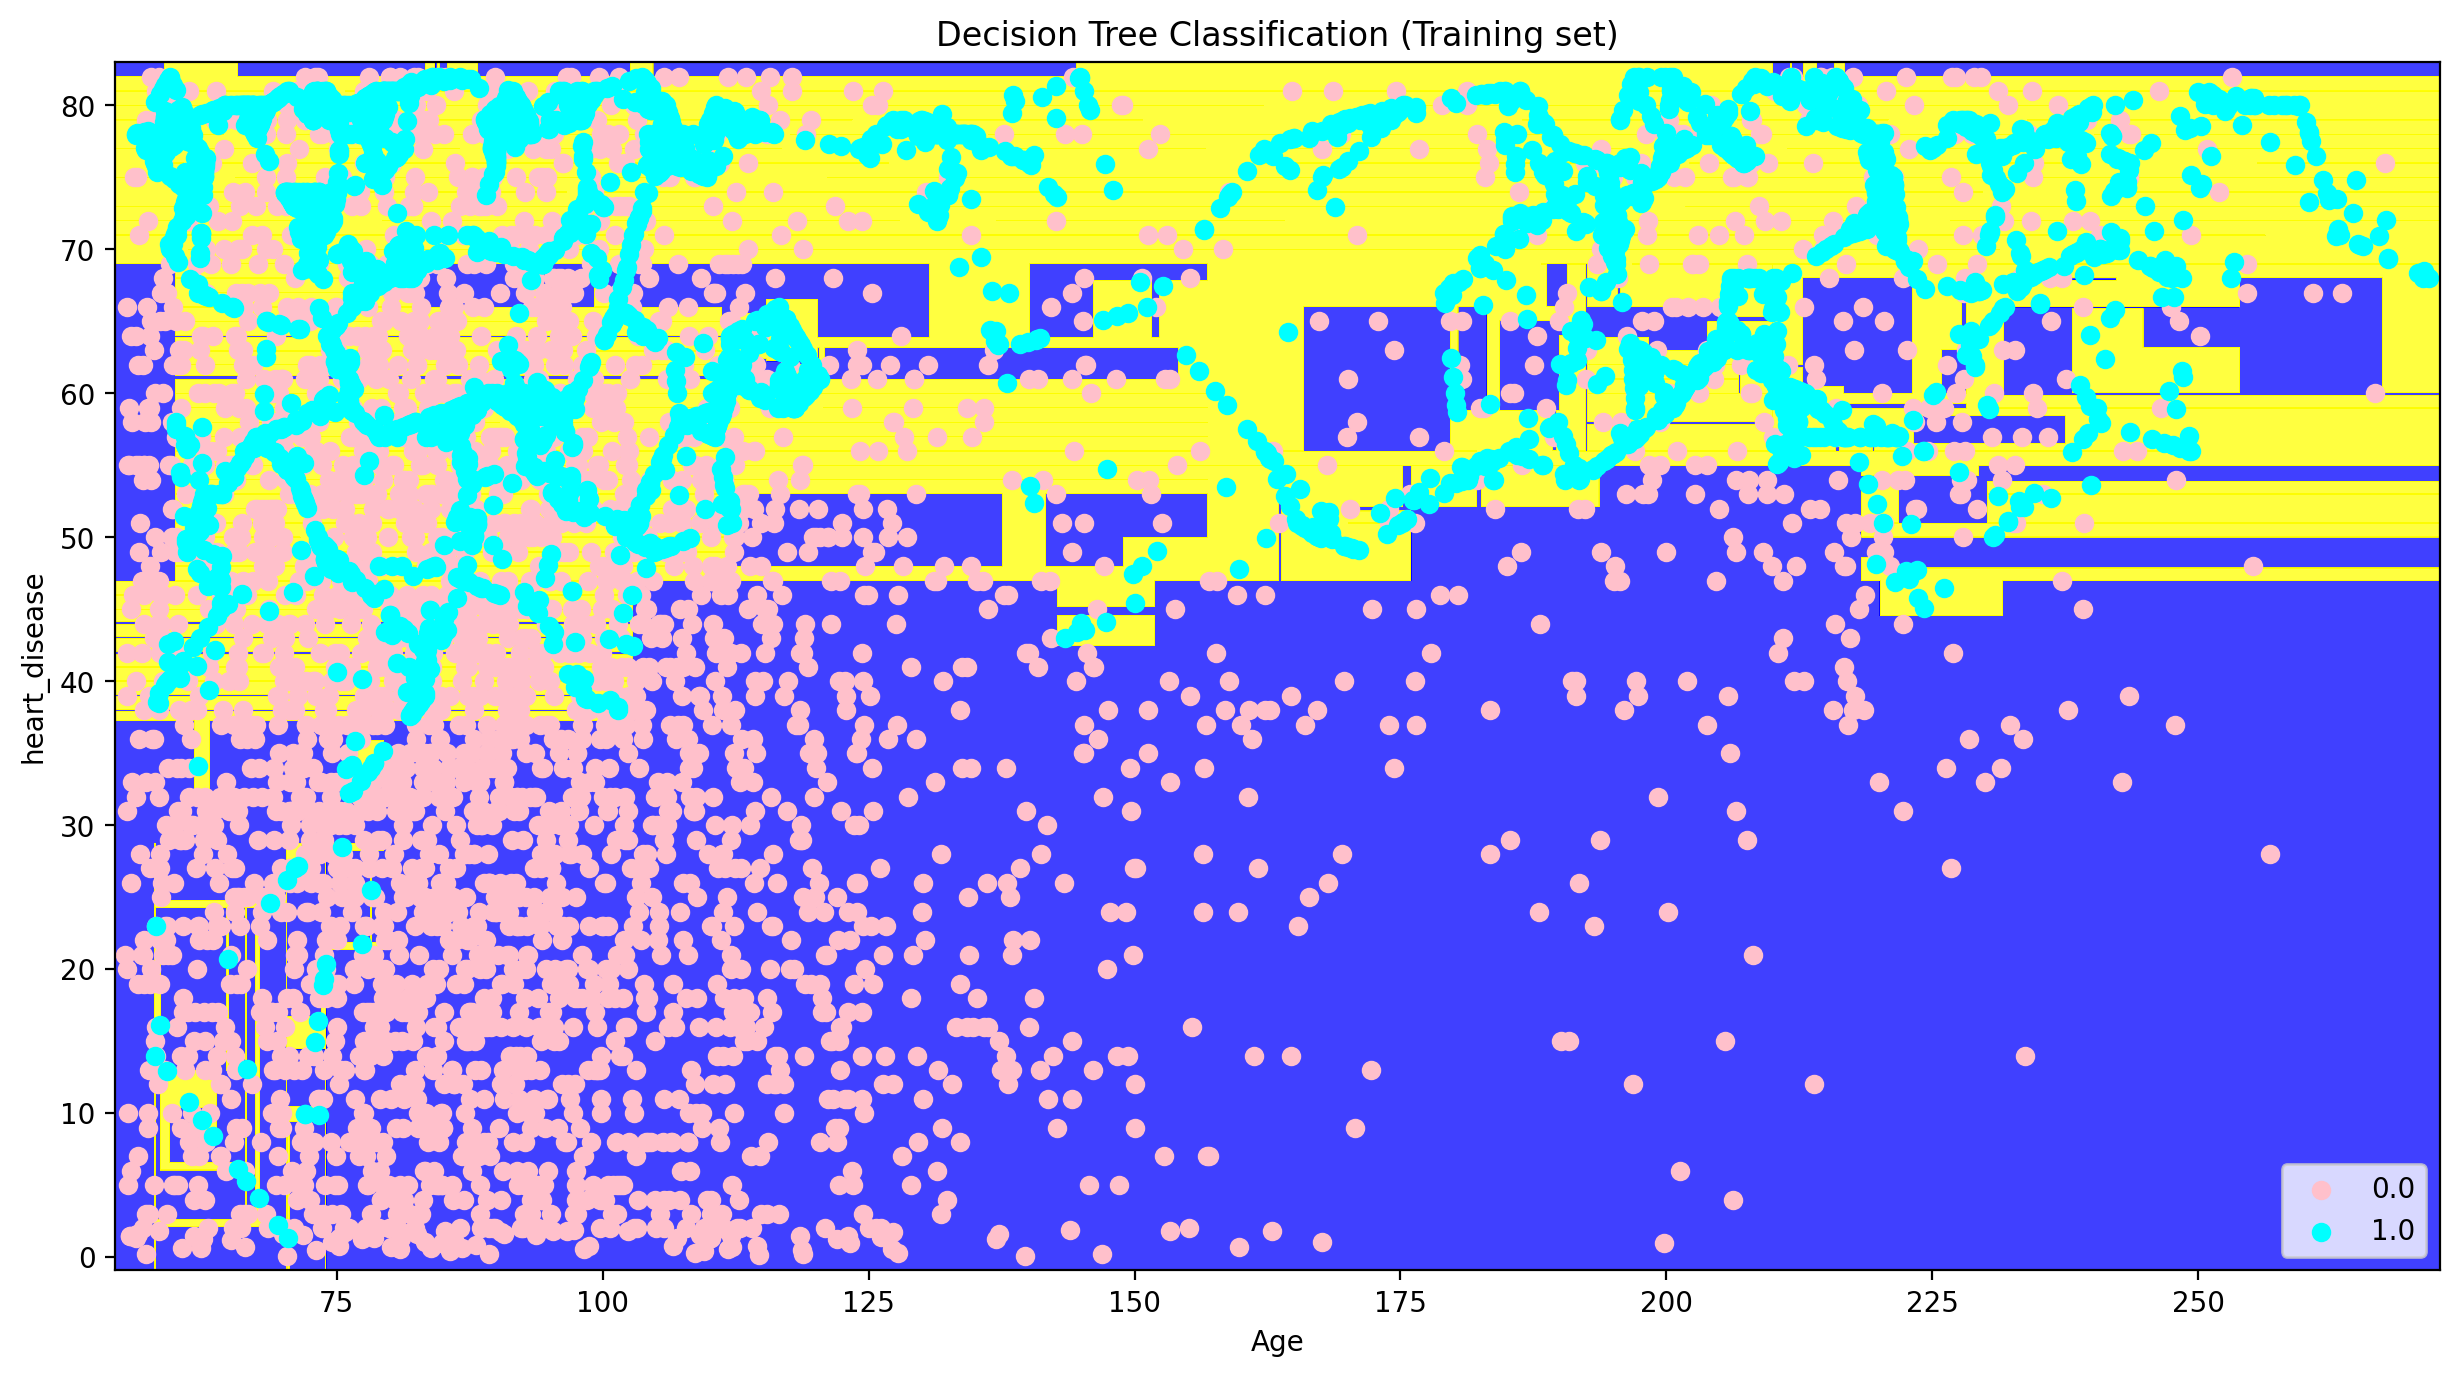

In [57]:
from matplotlib.colors import ListedColormap
figure(figsize=(15, 8), dpi=200)
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('pink', 'cyan'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('heart_disease')

plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


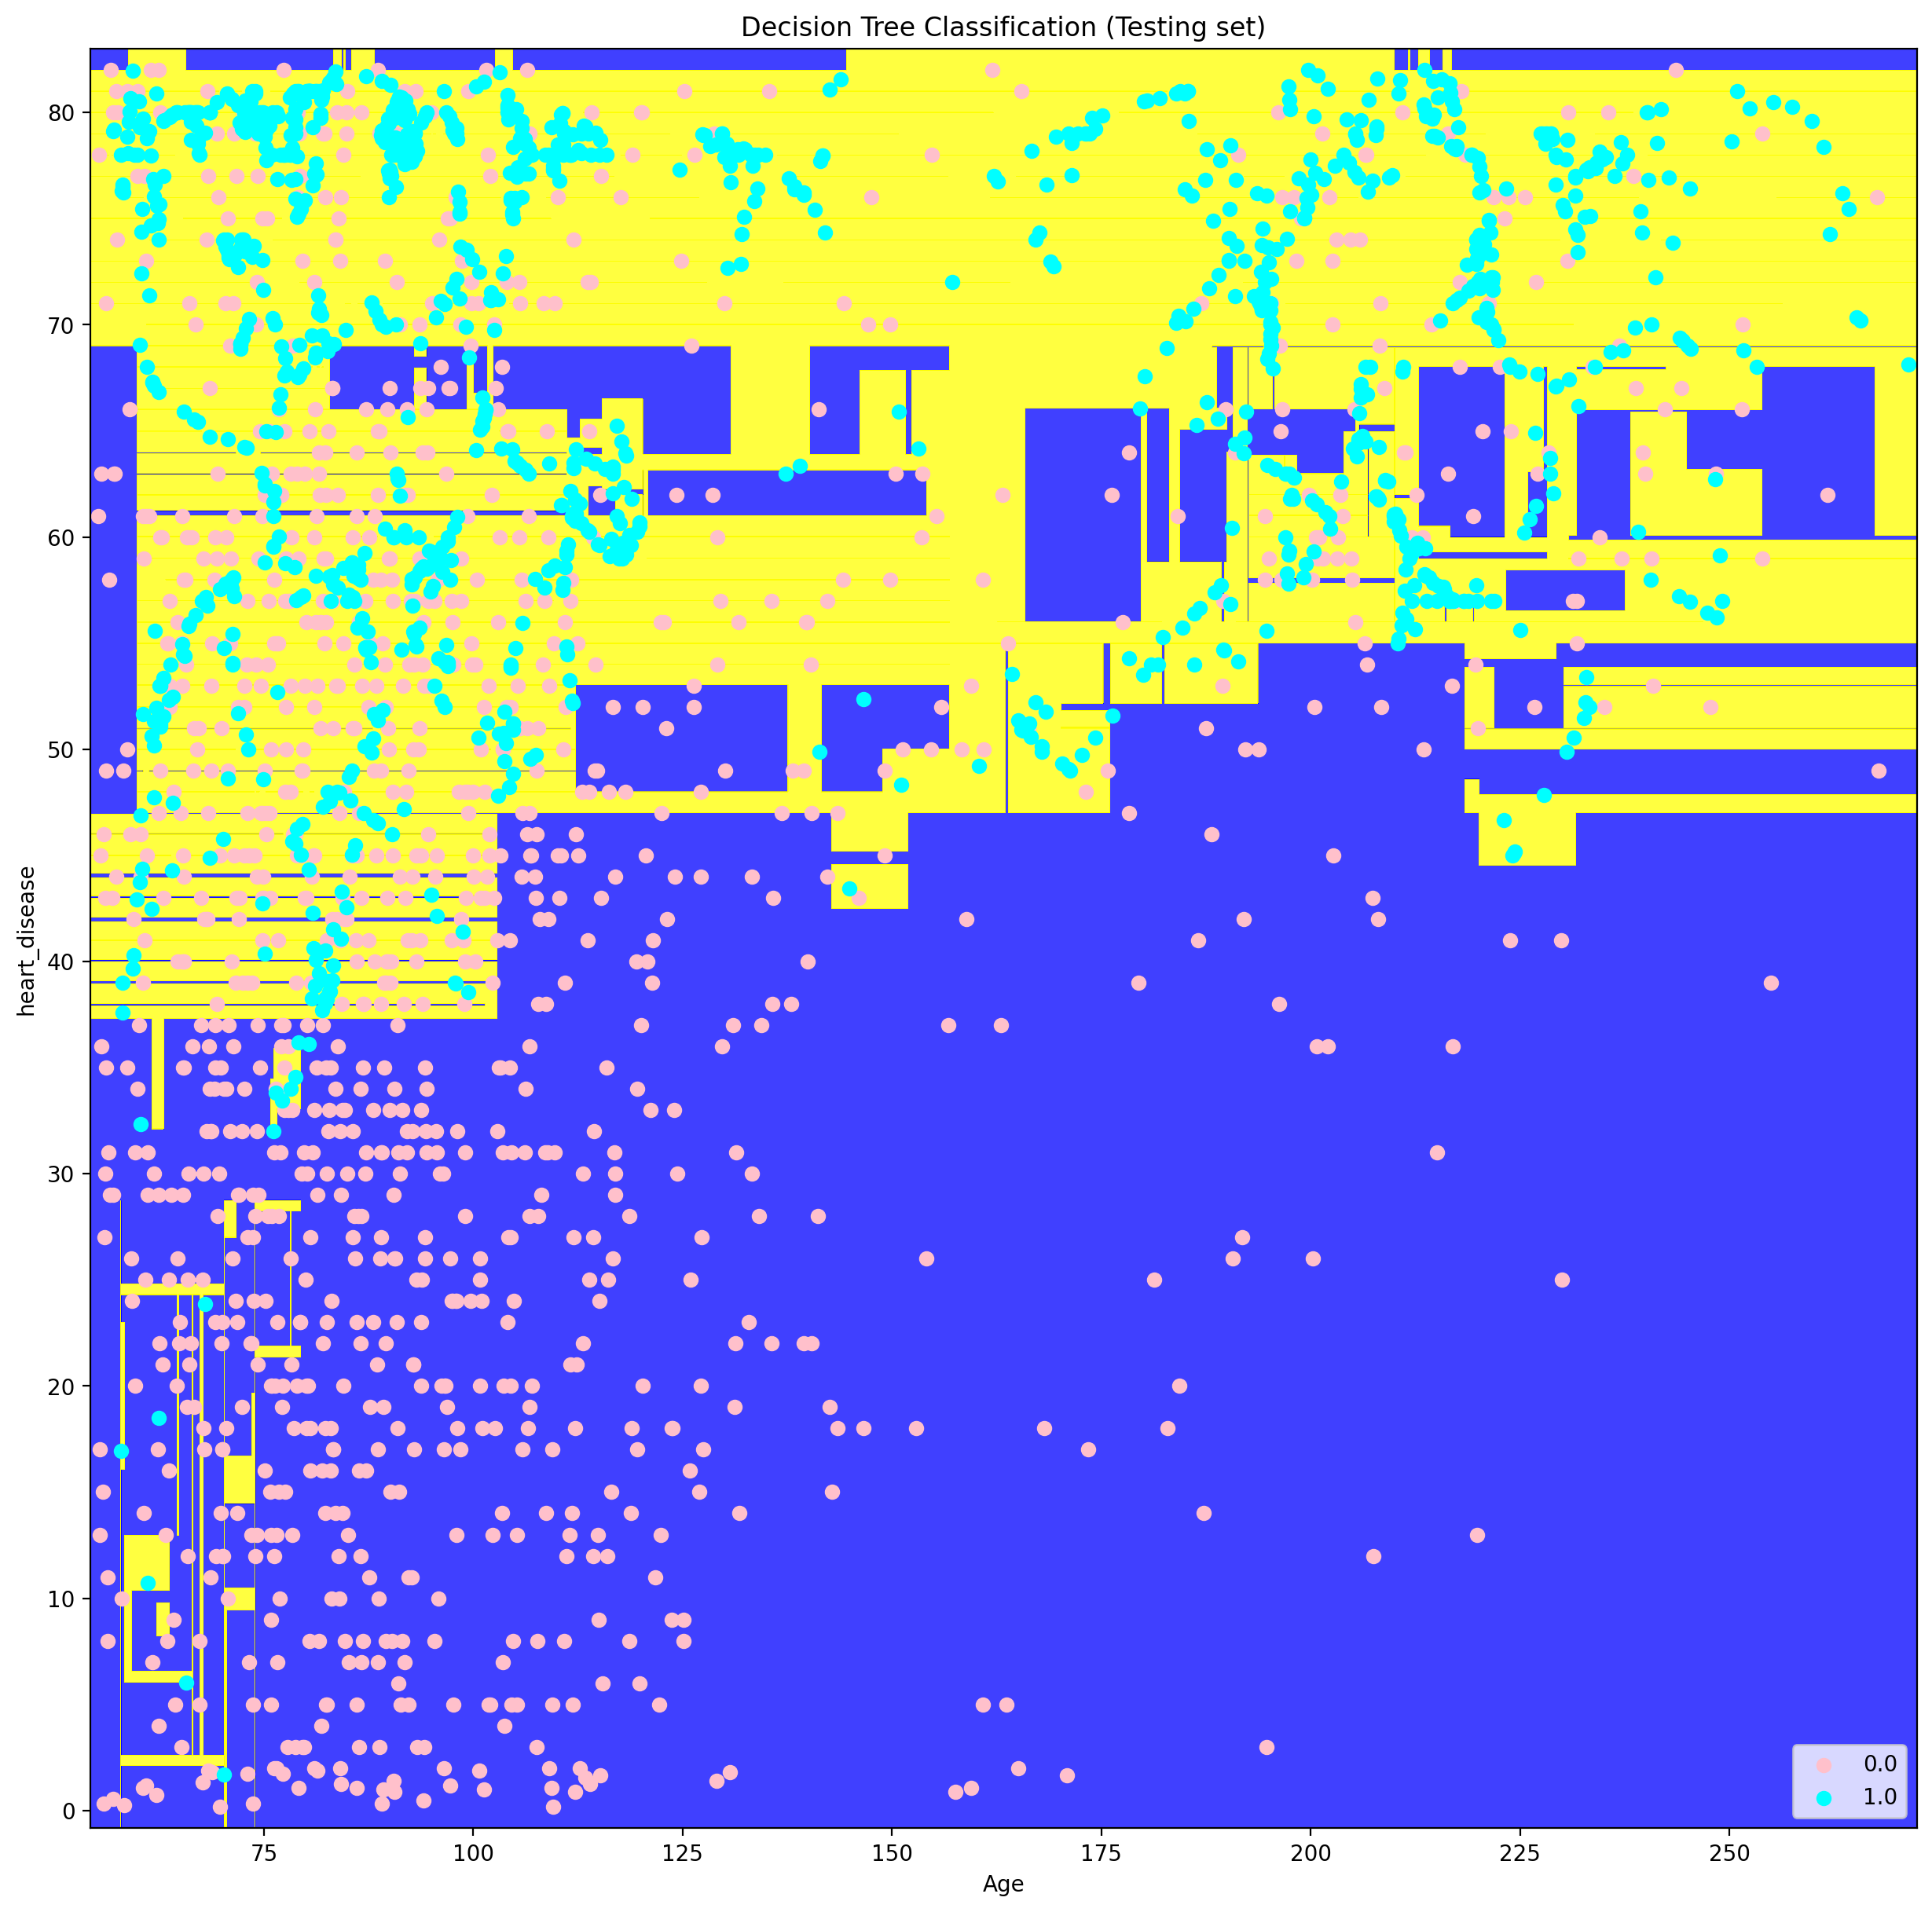

In [56]:
from matplotlib.colors import ListedColormap
figure(figsize=(15, 8), dpi=200)
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('pink', 'cyan'))(i), label = j)
plt.title('Decision Tree Classification (Testing set)')
plt.xlabel('Age')
plt.ylabel('heart_disease')

plt.legend()
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree

X, y = X_train, Y_train
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [ ]:
tree.plot_tree(clf)